## Alex Khvatov Midterm project

The dataset I selected for this project comes from https://archive.ics.uci.edu/dataset/45/heart+disease

This project represents a classification problem given the criteria.

    For this project we will try to use 

In [97]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

### Dataset background:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

In particular, the Cleveland database is the only one that has been used by ML researchers to data and this is what we are going to use for this midterm project.


The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  


One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

Attribute Information:
* Only 14 used
    1. #3  (age)       
    2. #4  (sex)       
    3. #9  (cp) - chest pain        
    4. #10 (trestbps)  resting blood pressure
    5. #12 (chol)      cholesterol
    6. #16 (fbs)       fasting blood sugar
    7. #19 (restecg)   resting electrocardiographic results 
    8. #32 (thalach)   maximum heart rate achieved
    9. #38 (exang)     exercise induced angina (1 = yes; 0 = no)
    10. #40 (oldpeak)  ST depression induced by exercise relative to rest
    11. #41 (slope)    the slope of the peak exercise ST segment 
    12. #44 (ca)       number of major vessels (0-3) colored by flourosopy 
    13. #51 (thal)     3 = normal; 6 = fixed defect; 7 = reversable defect (A blood disorder called thalassemia)
    14. #58 (num)       (the predicted attribute)

<details>
       <summary>Complete attribute documentation</summary>
       
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
     12 chol: serum cholestoral in mg/dl
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
     32 thalach: maximum heart rate achieved
     38 exang: exercise induced angina (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     44 ca: number of major vessels (0-3) colored by flourosopy
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (A blood disorder called thalassemia)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient 
	(I replaced this with the dummy string "name")
    
    Missing Attribute Values: Several.  Distinguished with value -9.0.
</details>

## Data Preparation

In [2]:
#To make it easier to look up the meanings of columns we are going to create a dictionary of columns-explanations.
column_meanings = {'age':'Age', 
                   'sex': 'Gender',
                   'cp': 'Chest Pain',
                   'trestbps': 'Resting Blood Pressure',
                   'chol' : 'Cholesterol',
                   'fbs':'Fasting blood sugar',
                   'restecg':'Resting electrocardiographic results',
                   'thalach':'Maximum heart rate achieved',
                   'exang':'Exercise induced angina (1 = yes; 0 = no)',
                   'oldpeak': 'ST depression induced by exercise relative to rest',
                   'slope':'The slope of the peak exercise ST segment',
                   'ca':'Number of major vessels (0-3) colored by flourosopy',
                   'thal':'3 = normal; 6 = fixed defect; 7 = reversable defect (A blood disorder called thalassemia)',
                   'num':'The predicted attribute (heart disease diagnosis)'
                  }

In [3]:
#Columns defined - I will assign a more readable column names in place of abbreviated ones

columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

pwd = Path.resolve(Path("./data/processed.cleveland.data"))

p_cleveland_df = pd.read_csv(pwd, header=None, names= columns )
p_cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Now we need to make sure we deal with missing data

In [4]:
#Check for null values
p_cleveland_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
string_columns = list(p_cleveland_df.dtypes[p_cleveland_df.dtypes == 'object'].index)
for c in string_columns:
    p_cleveland_df[c] = p_cleveland_df[c].str.strip()
    

In [6]:
for c in columns:
    col_vals = list(p_cleveland_df[c].values)
    if('?' in col_vals):
        print(f"Missing data in {c} = {col_vals.count('?')}")


Missing data in ca = 4
Missing data in thal = 2


In [7]:
#Since we cannot impute the value for categorical value column - we are going to drop the missing 'thal' rows
p_cleveland_df = p_cleveland_df[p_cleveland_df['thal']!='?']

#Missing data for 'ca' column (number of major vessels (0-3) colored by flourosopy) we are going to set to 0
p_cleveland_df.loc[p_cleveland_df['ca']=='?', 'ca'] = 0.0
p_cleveland_df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
list(p_cleveland_df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [9]:
p_cleveland_df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          3
num           5
dtype: int64

In [10]:
p_cleveland_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [11]:
p_cleveland_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [12]:
p_cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [13]:
#all columns can be converted to type int
int_columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal', 'num']
float_columns = ['oldpeak']


for c in int_columns:
    p_cleveland_df[c] = pd.to_numeric(p_cleveland_df[c], errors='coerce')
    p_cleveland_df[c] = p_cleveland_df[c].astype(int)


In [14]:
p_cleveland_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [15]:
p_cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [16]:
#At this point we have 'clean' dataset.
#Because 'num' can be 0 - for healthy and other numbers for having presence of a heart disease we can change all the numbers to 1
p_cleveland_df.loc[p_cleveland_df['num']!=0, 'num'] = 1

In [17]:
p_cleveland_df.nunique()
#Based on the above output we can identify 'age', 'trestbps', 'chol', 'thalach', 'oldpeak' as numeric columns and the rest as categorical


age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           2
dtype: int64

__We need to convert categorical variables to String for later one-hot encoding because for numerical variables Dict Vectorizer does not transform - leaves as-is__

In [18]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg',  'exang',  'slope', 'ca', 'thal']
for c in categorical_columns:
    p_cleveland_df[c] = p_cleveland_df[c].astype(str)

In [19]:
p_cleveland_df.head().T

,0,1,2,3,4
age,63,67,67,37,41
sex,1,1,1,1,0
cp,1,4,4,3,2
trestbps,145,160,120,130,130
chol,233,286,229,250,204
fbs,1,0,0,0,0
restecg,2,2,2,0,2
thalach,150,108,129,187,172
exang,0,1,1,0,0
oldpeak,2.3,1.5,2.6,3.5,1.4


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(p_cleveland_df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [22]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [23]:
y_train = df_train.num.values
y_val = df_val.num.values
y_test = df_test.num.values

In [24]:
del df_train['num']
del df_val['num']
del df_test['num']

## EDA (Exploratory Data Analysis)

In [25]:
df_full_train = df_full_train.reset_index(drop=True)


In [26]:
df_full_train.num.value_counts(normalize=True)

num
0    0.529167
1    0.470833
Name: proportion, dtype: float64

In [27]:
#in our train dataset 47% of the patients have been diagnosed with heart disease (heart disease rate)

In [28]:
global_heart_disease_rate = df_full_train.num.mean()
round(global_heart_disease_rate, 2)

np.float64(0.47)

In [29]:
# the reason mean gives churn rate is b/c in binary viarable is xi is 0 or 1 the sum of ones gives mean

**Mean** 
$$M=1/n\sum_{i=1}^n x_i$$

In [30]:
df_full_train.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

## Columns 

In [31]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg',  'exang',  'slope', 'ca', 'thal']
numeric_columns = ['age', 'trestbps', 'chol', 'thalach','oldpeak']

## Heart Disease Rate and Risk Factor

In [32]:
# sex (1 = male; 0 = female)
heart_disease_in_males = df_full_train[df_full_train.sex == 1].num.mean()
heart_disease_in_females = df_full_train[df_full_train.sex == 0].num.mean()
print(f"{heart_disease_in_males=} \n{heart_disease_in_females=}")
print(f"{global_heart_disease_rate=}")

heart_disease_in_males=nan 
heart_disease_in_females=nan
global_heart_disease_rate=np.float64(0.4708333333333333)


In [33]:
for c in categorical_columns:
    print(f"{column_meanings[c].center(30)}")
    df_group = df_full_train.groupby(c).num.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heart_disease_rate
    df_group['risk'] = df_group['mean'] / global_heart_disease_rate
    display(df_group)
    print()
    print()

            Gender            


,mean,count,diff,risk
sex,,,,
0,0.269231,78,-0.201603,0.571818
1,0.567901,162,0.097068,1.206162




          Chest Pain          


,mean,count,diff,risk
cp,,,,
1,0.368421,19,-0.102412,0.782487
2,0.189189,37,-0.281644,0.401818
3,0.231884,69,-0.238949,0.492497
4,0.721739,115,0.250906,1.532897




     Fasting blood sugar      


,mean,count,diff,risk
fbs,,,,
0,0.480392,204,0.009559,1.020302
1,0.416667,36,-0.054167,0.884956




Resting electrocardiographic results


,mean,count,diff,risk
restecg,,,,
0,0.377049,122,-0.093784,0.800812
1,1.000000,2,0.529167,2.123894
2,0.560345,116,0.089511,1.190113




Exercise induced angina (1 = yes; 0 = no)


,mean,count,diff,risk
exang,,,,
0,0.327044,159,-0.143789,0.694607
1,0.753086,81,0.282253,1.599476




The slope of the peak exercise ST segment


,mean,count,diff,risk
slope,,,,
1,0.280702,114,-0.190132,0.596181
2,0.636364,110,0.165530,1.351569
3,0.687500,16,0.216667,1.460177




Number of major vessels (0-3) colored by flourosopy


,mean,count,diff,risk
ca,,,,
0,0.283688,141,-0.187145,0.602523
1,0.685185,54,0.214352,1.455261
2,0.806452,31,0.335618,1.712818
3,0.785714,14,0.314881,1.668774




3 = normal; 6 = fixed defect; 7 = reversable defect (A blood disorder called thalassemia)


,mean,count,diff,risk
thal,,,,
3,0.248120,133,-0.222713,0.526981
6,0.583333,12,0.112500,1.238938
7,0.768421,95,0.297588,1.632045


### Conclusion

1. Males (1) are more likely to be diagnosed with heart disease than females
2. Asymptomatic chest pain leads to heart disease than other types of chest pain
3. Higher fasting blood sugar leads to heart disease, but not sugnificantly
4. Patinet with resting electrocardiographic results (Value 1:) having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) are at sugnificant risk to be diagnosed
5. Exercise induced angina if identified (1) has a higher risk of being diagnosed with heart disease
6. The slope of the peak exercise ST segment when flat (2) is at moderat risk of being diagnosed
7. When number of major vessels (0-3) colored by flourosopy is higher - the risk is higher than none (0). NOTE: this column had 4 values missing and replaced with 0, which may lead to a skewed results.
8. Higher risk of having a diagnosis for patients with a thalassemia - a presence of a disorder (values other than 3).

## Mutual information as a measure of relative importance of categorical variables

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
def mutual_info_heart_disease_score(series):
    return mutual_info_score(series, df_full_train.num)

In [36]:
mi = df_full_train[categorical_columns].apply(mutual_info_heart_disease_score)
mi.sort_values(ascending=False)

thal       0.132791
cp         0.125540
ca         0.107134
exang      0.084066
slope      0.067643
sex        0.040504
restecg    0.023130
fbs        0.001044
dtype: float64

### Conclusion
Relative important columns to being diagnosed with a heart disease is blood disorder (thal), chst pain (cp) and number vessels colored on flouroscopy. The least important feature is fasting blood sugar (fbs)

## Correlation (Pearson correlation)

Correlation coefficient - way to measure degrees of dependencies betwee two variables

$$-1 <= r <= 1$$

0.0 to -0.1 - no correlation
0.0 to 0.1 - no correlation

0.2 to 0.5 - moderate correlation

0.6 to 1 - strong

$$y \exists \{0,1\}, x \exists \mathbb{R}$$

In [37]:
df_full_train[numeric_columns].corrwith(df_full_train.num)

age         0.231747
trestbps    0.147038
chol        0.087461
thalach    -0.438380
oldpeak     0.437680
dtype: float64

### Conclusion

Maximum heart rate achieved (thalach) has negative correlation to being diagnosed with a heart disease: the higher the rate - the less chance to be diagnosed.
The higher the ST depression induced by exercise relative to rest (oldpeak) the higher the risk of being diagnosed.
Age has moderate correlation to being diagnosed.
Cholesterold has the least correlation to heart disease diagnosis.



## One-hot encoding (of categorical variables)

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [39]:
dv = DictVectorizer(sparse=False)

In [40]:
train_dicts=df_train[categorical_columns + numeric_columns].to_dict(orient='records')

In [41]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [42]:
dv.get_feature_names_out()

array(['age', 'ca=0', 'ca=1', 'ca=2', 'ca=3', 'chol', 'cp=1', 'cp=2',
       'cp=3', 'cp=4', 'exang=0', 'exang=1', 'fbs=0', 'fbs=1', 'oldpeak',
       'restecg=0', 'restecg=1', 'restecg=2', 'sex=0', 'sex=1', 'slope=1',
       'slope=2', 'slope=3', 'thal=3', 'thal=6', 'thal=7', 'thalach',
       'trestbps'], dtype=object)

In [43]:
# Validation dictionaries
val_dicts = df_val[categorical_columns + numeric_columns].to_dict(orient='records')

In [44]:
X_val = dv.transform(val_dicts)

### Train logistic regression model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [47]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [48]:
#here threshold is adjusted to 0.55 b/c of the study made below
y_pred = model.predict_proba(X_val)[:, 1]
y_decision = (y_pred >= 0.55)

In [49]:
accuracy = round((y_val == y_decision).mean(),2)
print(f"Answer: Accuracy {accuracy}")

Answer: Accuracy 0.83


In [50]:
#Now let's train a regularized logistic regression.

In [51]:
def check_for_accuracy(c):
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_decision = (y_pred >= 0.5)
    accuracy = round((y_val == y_decision).mean(),3)
    #print(f"Answer: Accuracy {accuracy}")
    return accuracy

In [52]:
accuracies = [(c, check_for_accuracy(c)) for c in [0.01, 0.1, 1, 10, 100]]
sorted_accuracies = sorted(accuracies, key=lambda x: x[1])
sorted_accuracies

[(0.01, np.float64(0.817)),
 (100, np.float64(0.817)),
 (1, np.float64(0.833)),
 (10, np.float64(0.833)),
 (0.1, np.float64(0.867))]

In our case best regularization parameter (C) is 0.1

C=0.1

## Final logistic regression model

In [53]:
dicts_full_train = df_full_train[categorical_columns + numeric_columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.num.values


logistic_regression_model = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, random_state=42)
logistic_regression_model.fit(X_full_train, y_full_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')

In [54]:
dicts_test = df_test[categorical_columns + numeric_columns].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [55]:
y_pred = logistic_regression_model.predict_proba(X_test)[:,1]

In [56]:
heart_disease_pred = (y_pred >= 0.55)
print(f"Accuracy of the final model: {(heart_disease_pred == y_test).mean()}")

Accuracy of the final model: 0.9016393442622951


### Let's check for accuracy using sklern:

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
y_pred = logistic_regression_model.predict_proba(X_val)[:,1]

In [59]:
accuracy_score(y_val, y_pred >= 0.5)

0.8666666666666667

In [60]:
threshholds = np.linspace(0, 1, 21)
scores = []

for t in threshholds:
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)
    print("%.2f  %.3f" % (t, score))

0.00  0.450
0.05  0.483
0.10  0.567
0.15  0.650
0.20  0.733
0.25  0.750
0.30  0.800
0.35  0.833
0.40  0.883
0.45  0.883
0.50  0.867
0.55  0.883
0.60  0.883
0.65  0.883
0.70  0.883
0.75  0.867
0.80  0.817
0.85  0.783
0.90  0.733
0.95  0.717
1.00  0.550


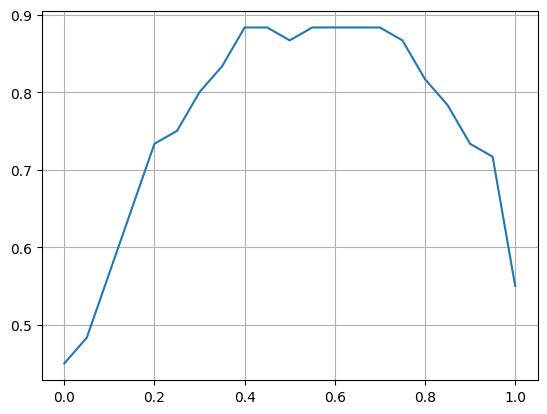

In [61]:
plt.subplots()
plt.plot(threshholds, scores)
plt.grid()

### Conclusion: Our model givs best accuracy when t=0.55 or t=0.45, but NOT at t=0.5

### Let's plot the ROC with sklearn

In [62]:
from sklearn.metrics import roc_curve

In [63]:
#making sure we are using the right 'y_pred'
y_pred = logistic_regression_model.predict_proba(X_val)[:,1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

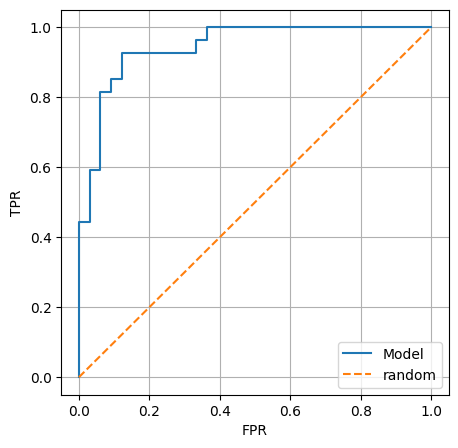

In [65]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label="Model")
plt.plot([0,1], [0,1], label= 'random', linestyle='--')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()

### By the shape of the roc curve we may conclude that we have a good model

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [67]:
roc_auc_score(y_val, y_pred)

np.float64(0.9438832772166106)

In [68]:
# Let's perform K-FOLD cross validation
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numeric_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train=dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train, y_train)
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical_columns + numeric_columns].to_dict(orient = "records")
    X=dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [69]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]): 

    scores = []
    
    kfold = KFold(n_splits, shuffle=True, random_state=1)

    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.num.values
        y_val = df_val.num.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.5f +- %.5f' % (C, np.mean(scores), np.std(scores)))


  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.76131 +- 0.07529
C=0.01 0.82505 +- 0.05120
C=0.1 0.89538 +- 0.02548
C=0.5 0.90340 +- 0.03266
C=1 0.90337 +- 0.03130
C=5 0.90406 +- 0.03253
C=10 0.90192 +- 0.02856


In [148]:
# C=5 gives the best performance
# Now we need to train our FINAL model on the full train dataset and evaluate on test dataset

dv, model = train(df_full_train, df_full_train.num.values, C=1.0)

y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print(f"Final model {auc=:.4}")

Final model auc=0.9522


## Decision tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [85]:
train_dicts=df_train[categorical_columns + numeric_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
y_train = df_train.num.values
y_val = df_val.num.values

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [86]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.667
   2 -> 0.750
   3 -> 0.868
   4 -> 0.859
   5 -> 0.789
   6 -> 0.766
  10 -> 0.750
  15 -> 0.771
  20 -> 0.771
None -> 0.771


In [87]:
#The best tree depth: 3

In [102]:
#let's create a dataframe of different combinations of depth and min sample leaves.
scores = []

for d in [2,3,4,5,6, 7, 10, 15, 20, None]:
    for s in [1,2,5,10,15,20,50]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, s, auc))
    

In [110]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns = ['max_depth'], values=['auc'])
df_scores_pivot.round(4)

auc                                                  \
max_depth            NaN    2.0     3.0     4.0     5.0     6.0     7.0    
min_samples_leaf                                                           
1                 0.7708  0.7500  0.8681  0.8585  0.7891  0.7873  0.7656   
2                 0.7830  0.7500  0.8681  0.8585  0.7925  0.7873  0.7873   
5                 0.8299  0.7500  0.8681  0.8533  0.8299  0.8342  0.8342   
10                0.8576  0.7500  0.8681  0.8576  0.8576  0.8576  0.8576   
15                0.8524  0.7500  0.8524  0.8524  0.8524  0.8524  0.8524   
20                0.8212  0.7500  0.8212  0.7569  0.7569  0.8212  0.7569   
50                0.6458  0.6806  0.6806  0.6458  0.6806  0.6806  0.6458   

                                          
max_depth           10.0    15.0    20.0  
min_samples_leaf                          
1                 0.7500  0.7917  0.7708  
2                 0.7830  0.7873  0.7656  
5                 0.8342  0.8299  0.8342  
10                0.8576  0.8576  0.8576  
15                0.8524  0.8524  0.8524  
20                0.7569  0.8212  0.8212  
50                0.6806  0.6806  0.6806

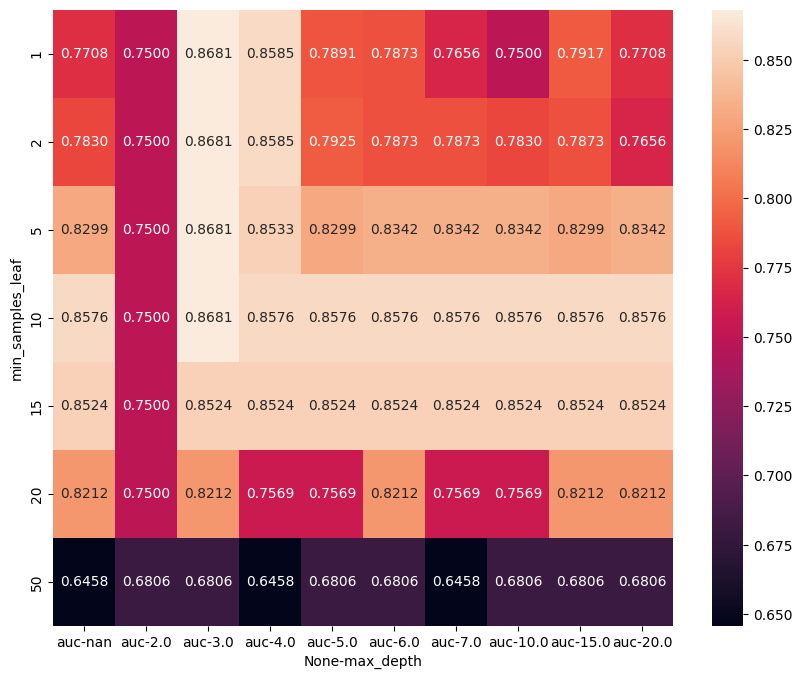

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_scores_pivot, annot=True, fmt='.4f')
plt.show()

#### The final decision tree classifier model should have 5 leafs and the max depth of 3

In [118]:

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]
print(f"Final DecisionTreeClassifier model {roc_auc_score(y_val, y_pred)=:.4}")

Final DecisionTreeClassifier model roc_auc_score(y_val, y_pred)=0.8681


## Ensembles and random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
#we will try various number of n_estimators to pick the best-performing one

scores = []
for d in [2,3, 5 , 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [126]:
columns=["max_depth", "n_estimators","auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,2,10,0.916667
1,2,20,0.901042
2,2,30,0.894097
3,2,40,0.907986
4,2,50,0.907986


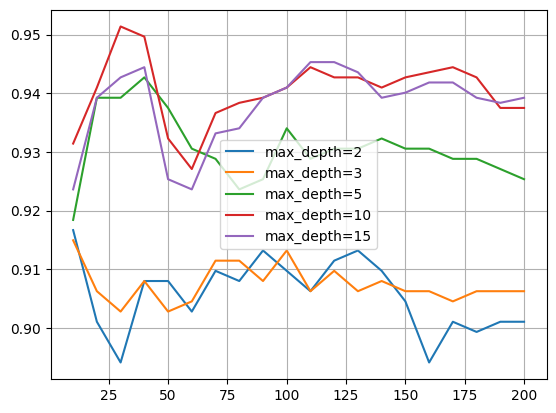

In [127]:
lines = []
for d in [2,3, 5 , 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    line, = plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
    lines.append(line)
plt.legend(handles=lines)
plt.grid()

#### For this model the best to have max_depth=10

In [142]:
max_depth = 10 #best one

#We are limiting number of estimators to be within 5 to 45 as at this point the model performs best

scores = []
for s in [1,3,5,10,50]:
    for n in range(5, 46, 1):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=1, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [143]:
columns=["min_sample_leaf", "n_estimators","auc"]
df_scores = pd.DataFrame(scores, columns=columns)

In [144]:
colors = ['black', 'blue', 'orange', 'red', 'gray']
min_sample_leaf_values = [1,3,5,10,50]

list(zip(min_sample_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'gray')]

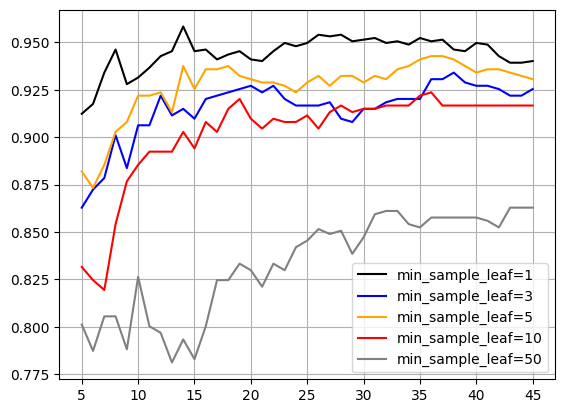

In [141]:
lines = []
for s, col in zip(min_sample_leaf_values, colors):
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    line, = plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_sample_leaf={s}", color=col)
    lines.append(line)
plt.legend(handles=lines)
plt.grid()

#### Min_sample_leaf = 1 resulsts in the best model

#### The final model

In [147]:
rf = RandomForestClassifier(n_estimators=13, max_depth=10, random_state=1, min_samples_leaf=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
print(f"Final DecisionTreeClassifier model {roc_auc_score(y_val, y_pred)=:.4}")

Final DecisionTreeClassifier model roc_auc_score(y_val, y_pred)=0.9453


## Gradient boosting and XGBoost

In [174]:
import xgboost as xgb
import re

from IPython.display import clear_output

In [175]:
def parse_output(output:str)->pd.DataFrame:
    #print(output)
    pattern = r"\[(\d+)\].+train-auc:([0-9.]+)\tval-auc:([0-9.]+)"
    results = []
    for line in output.strip().split('\n'):
        matches = re.findall(pattern, line)
        it, train, val = matches.pop()
        results.append((int(it), float(train), float(val)))
    return pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])

In [176]:
train_dicts=df_train[categorical_columns + numeric_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
y_train = df_train.num.values
y_val = df_val.num.values

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [177]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

Lets include evaluation (watchlist) to monitor what is going on at each step

In [178]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [416]:
%%capture output

xgb_params = {
    'eta':0.1,
    'max_depth': 3,
    'min_child_weight':1,
    'subsample': 0.4,
    'objective':'binary:logistic',
    'seed':1,
    'verbosity':1,
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)


In [417]:
s= output.stdout

In [418]:
df_score = parse_output(s)
#df_score

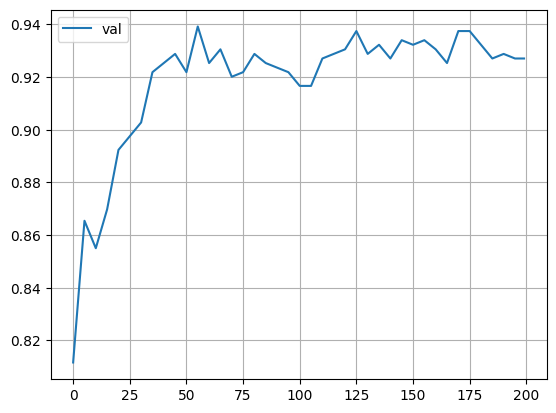

In [419]:
#plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.grid()

Tuning the following parameters:

* eta
* max_depth
* min_child_weight
* subsample

#### Let's tune ETA parameter

In [284]:
etas=['0.3', '1.0', '0.1', '0.05', '0.01']

In [315]:
%%capture output

for eta in etas:
    xgb_params = {
        'eta':eta,
         'max_depth': 6,
        'min_child_weight':1,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--eta={eta}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [317]:
def parse_outputs(output:str, key_name:str)->pd.DataFrame:
    scores={}
    results = []
    
    #print(output)
    pattern = r"\[(\d+)\].+train-auc:([0-9.]+)\tval-auc:([0-9.]+)"
    start_key_re = re.compile(f"<<--{key_name}=([0-9.]+)-->>").pattern
    
    end_key_re = r"<<--end-->>"
    
    current_key = ""
    for line in output.strip().split('\n'):
        matches = re.findall(start_key_re, line)
        if(matches):
            #found the beginning of a new eta
            current_key = matches.pop()
            results.clear()
            continue
        matches = re.findall(pattern, line)
        if(matches):
            it, train, val = matches.pop()
            results.append((int(it), float(train), float(val)))
            continue
        matches = re.findall(end_key_re, line)
        if(matches):
            scores[f'{key_name}={current_key}'] = pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])
    
    return scores

In [318]:
scores_etas = parse_outputs(output.stdout, 'eta')

In [319]:
scores_etas.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

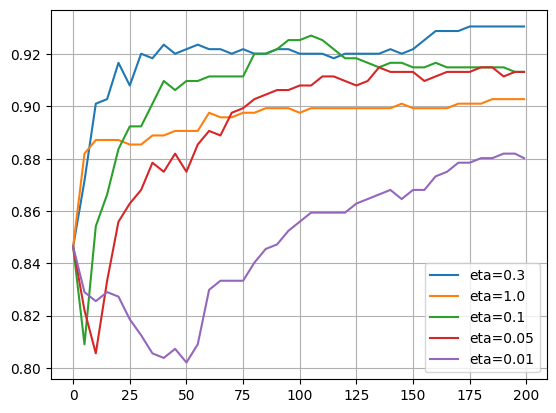

In [320]:
for eta in scores_etas.keys():
    df_score = scores_etas[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()
plt.grid()

Based on the graphs produced the best __eta is 0.1__ with _100_ iterations it learns not as fast as eta 0.3, but performs better with at 100 iterations. Other eta parameter values do not perform as good

#### Tuning max_depth

In [343]:
max_depth_values = [2,3,5,7,9,10]

In [344]:
%%capture output

for md in max_depth_values:
    xgb_params = {
        'eta':0.1,
        'max_depth': md,
        'min_child_weight':1,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--max_depth={md}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [345]:
scores_max_depth = parse_outputs(output.stdout, 'max_depth')

In [346]:
scores_max_depth.keys()

dict_keys(['max_depth=2', 'max_depth=3', 'max_depth=5', 'max_depth=7', 'max_depth=9', 'max_depth=10'])

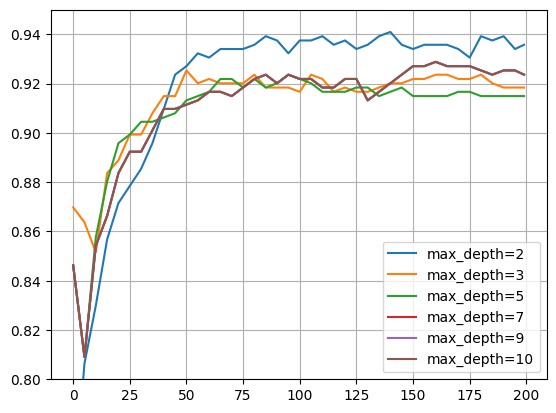

In [347]:
for max_depth in scores_max_depth.keys():
    df_score = scores_max_depth[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()
plt.ylim(0.8, 0.95)
plt.grid()

Conclusion: we experimented with various max_depth values - the best overall is __max_depth=3__, while it learns slower, it gives the best performance

#### Tuning min child weight

In [383]:
min_child_weight = [1, 3, 5, 7]
min_child_weight

[1, 3, 5, 7]

In [384]:
%%capture output

for mcw in min_child_weight:
    xgb_params = {
        'eta':0.1,
        'max_depth': 3,
        'min_child_weight':mcw,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--min_child_weight={mcw}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [385]:
scores_min_child_weight = parse_outputs(output.stdout, 'min_child_weight')
scores_min_child_weight.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=3', 'min_child_weight=5', 'min_child_weight=7'])

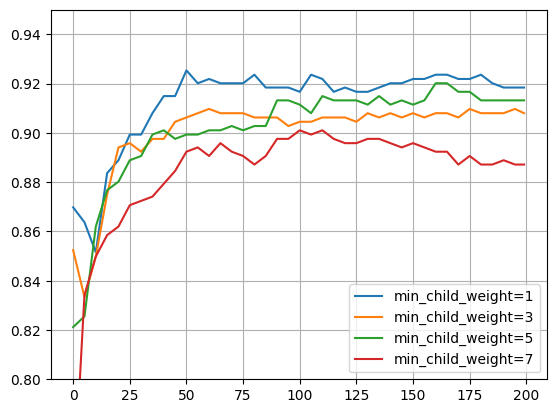

In [386]:
for mcw in scores_min_child_weight.keys():
    df_score = scores_min_child_weight[mcw]
    plt.plot(df_score.num_iter, df_score.val_auc, label=mcw)
plt.legend()
plt.ylim(0.8, 0.95)
plt.grid()

Conclusion: we experimented with various min_child_weight values - the best overall is __min_child_weight=1__, while it learns slower, it gives the best performance.
Any values above 7 were producing unsatisfactory results (they are not displayed in the diagram)



#### Tuning subsample

In [404]:
subsample = [0.3, 0.4, 1]
#eliminating 0.2, 0.5, 0.6, 0.8, due to producing degrading results

In [405]:
%%capture output

for subs in subsample:
    xgb_params = {
        'eta':0.1,
        'max_depth': 3,
        'min_child_weight':1,
        'subsample': subs,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--subsample={subs}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [406]:
scores_subsample = parse_outputs(output.stdout, 'subsample')
scores_subsample.keys()

dict_keys(['subsample=0.3', 'subsample=0.4', 'subsample=1'])

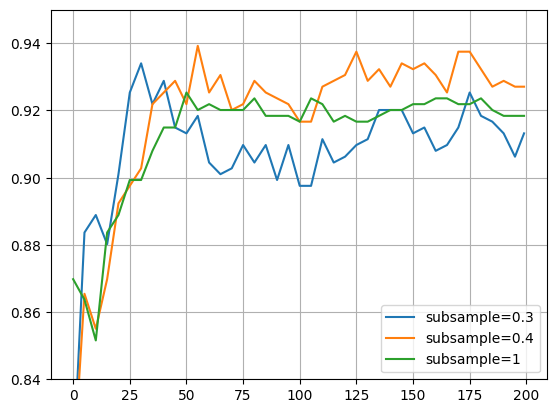

In [407]:
for subs in scores_subsample.keys():
    df_score = scores_subsample[subs]
    plt.plot(df_score.num_iter, df_score.val_auc, label=subs)
plt.legend()
plt.ylim(0.84, 0.95)
plt.grid()

Conclusion: we experimented with various subsample values - the best overall is __subsample=0.4__

#### Let's tune alpha

In [434]:
alpha = [0, 0.01, 0.1, 0.5, 1, 2]
# eliminated 100, 5, 10 due to producing an unsatisfactory results

In [435]:
%%capture output

for a in alpha:
    xgb_params = {
        'eta':0.1,
        'max_depth': 3,
        'min_child_weight':1,
        'subsample': 0.4,
        'alpha': a,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--alpha={a}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [436]:
scores_alpha = parse_outputs(output.stdout, 'alpha')
scores_alpha.keys()

dict_keys(['alpha=0', 'alpha=0.01', 'alpha=0.1', 'alpha=0.5', 'alpha=1', 'alpha=2'])

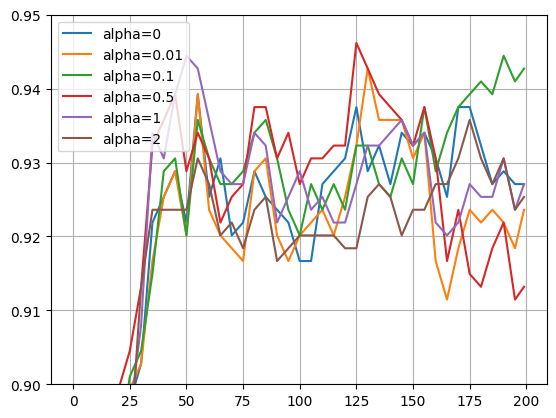

In [441]:
for a in scores_alpha.keys():
    df_score = scores_alpha[a]
    plt.plot(df_score.num_iter, df_score.val_auc, label=a)
plt.legend()
plt.ylim(0.9, 0.95)
plt.grid()

Conclusion: we experimented with various alpha values - the best overall is __alpha=1__

### The final model for XGBoost

In [460]:
xgb_params = {
        'eta':0.1,
        'max_depth': 3,
        'min_child_weight':1,
        'subsample': 0.4,
        'alpha': 1,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=51, verbose_eval=5)


[0]	train-auc:0.86653	val-auc:0.74913
[5]	train-auc:0.92757	val-auc:0.87066
[10]	train-auc:0.93673	val-auc:0.84722
[15]	train-auc:0.94273	val-auc:0.88021
[20]	train-auc:0.94458	val-auc:0.88889
[25]	train-auc:0.94873	val-auc:0.89583
[30]	train-auc:0.95331	val-auc:0.90799
[35]	train-auc:0.95680	val-auc:0.93403
[40]	train-auc:0.95746	val-auc:0.93056
[45]	train-auc:0.95931	val-auc:0.93924
[50]	train-auc:0.96051	val-auc:0.94444


In [461]:
y_pred = model.predict(dval)
print(f"Final DecisionTreeClassifier model {roc_auc_score(y_val, y_pred)=:.4}")

Final DecisionTreeClassifier model roc_auc_score(y_val, y_pred)=0.9444


#### At 51 iterations our XGBoost model on validation dataset is 0.9444 